In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
from scipy.io import netcdf
import xesmf as xe
import sys
sys.path.insert(0,'../')
import environment
import os
import glob

In [2]:
data_source = 'http://www.earthbyte.org/webdav/ftp/Data_Collections/Scotese_Wright_2018_PaleoDEM/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip'
data_dest = os.path.join(os.environ.get('ISCA_REPO_DIR'),'experiments/input/land_masks')
cmd = f'cd {data_dest}; wget {data_source}; '
cmd += f'unzip {os.path.join(data_dest,"Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc.zip")}'
#os.system(cmd)

In [3]:
def regrid_continent_maps(remap_file):

    base_file = os.path.join(os.environ.get('GFDL_BASE'),'input/land_masks/era_land_t42.nc')
    base = xr.open_mfdataset(base_file)

    ds_out = xr.Dataset({'lat': (['lat'], base['lat'].values),
                         'lon': (['lon'], base['lon'].values)})


    out_file = f'continents_{remap_file.split("_")[-1]}'

    out_dir = os.path.join(os.environ.get('ISCA_REPO_DIR'),'experiments/input/land_masks')
    out_file = os.path.join(out_dir,out_file)
 
    land = xr.open_mfdataset(remap_file)
    regridder = xe.Regridder(land, ds_out, 'bilinear')
    ds_out = regridder(land)
    tmp = np.zeros(ds_out['z'].values.shape)
    tmp = ds_out['z'].values
    tmp[tmp<0] = 0
    ds_out['z'] = (ds_out.dims,tmp)
    ds_out['land_mask'] = (ds_out.dims,np.array(ds_out['z'].values > 0.0,dtype=float))
    ds_out = ds_out.rename({'z':'zsurf'})
    ds_out = ds_out.fillna(0)
    os.system(f'rm -f {out_file}')
    ds_out.to_netcdf(out_file)
    print(f"{out_file}")

In [4]:
files = glob.glob(f'{data_dest}/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map*.nc')

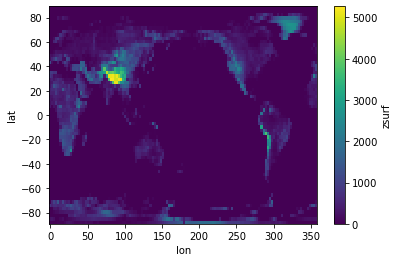

In [5]:
tmp = xr.open_mfdataset(f'{data_dest}/continents_5Ma.nc')
tmp['zsurf'].plot.imshow(vmin=tmp['zsurf'].values.min(),vmax=tmp['zsurf'].values.max())

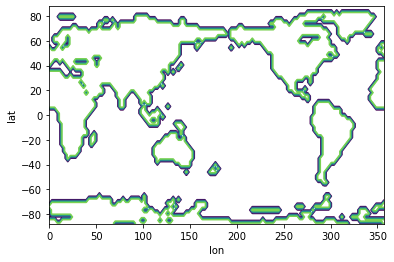

In [6]:
tmp['land_mask'].plot.contour()

In [16]:
tmp['zsurf'].values.min()

-7096.523602765461

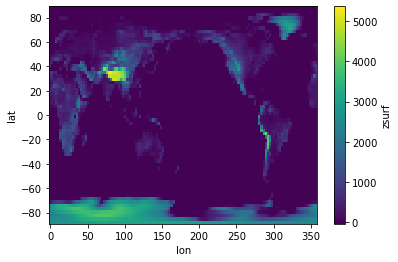

In [8]:
base_file = os.path.join(os.environ.get('GFDL_BASE'),'input/land_masks/era_land_t42.nc')
base = xr.open_mfdataset(base_file)
base['zsurf'].plot.imshow(vmin=base['zsurf'].values.min(),vmax=base['zsurf'].values.max())

In [8]:
base['zsurf'].values.min()

-40.93211

In [14]:
files[0]

'/home/ec2-user/environment/isca_aws/experiments/input/land_masks/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map01_PALEOMAP_1deg_Holocene_0Ma.nc'

In [15]:
for f in files:
    regrid_continent_maps(f)

/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_0Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_5Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_10Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_15Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_20Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_25Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_30Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_35Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_40Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_45Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_50Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_55Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_60Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_65Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_70Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_75Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_80Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_85Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_90Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_95Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_100Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_105Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_110Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_115Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_120Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_125Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_130Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_135Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_140Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_145Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_150Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_155Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_160Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_165Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_170Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_175Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_180Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_185Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_190Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_195Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_205Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_200Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_215Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_210Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_225Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_220Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_235Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_230Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_240Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_245Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_250Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_255Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_265Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_260Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_270Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_275Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_285Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_280Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_290Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_295Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_300Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_305Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_315Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_310Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_320Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_325Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_335Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_330Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_345Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_340Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_355Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_350Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_365Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_360Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_375Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_370Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_385.2Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_380Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_390.5Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_395Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_405Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_400Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_410Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_415Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_420Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_425Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_435Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_430Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_440Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_445Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_450Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_455Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_465Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_460Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_475Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_470Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_485Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_480Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_495Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_490Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_505Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_510Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_530Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_500Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_515Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_525Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_520Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_535Ma.nc
/home/ec2-user/environment/isca_aws/experiments/input/land_masks/continents_540Ma.nc


/data/team/conda/envs/isca_proc/lib/python3.9/site-packages/xesmf/frontend.py:555: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(
